In [153]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
sns.set_theme()


In [3]:
# Wprowadź poprawne ścieżki dla pliów
users_path = '/home/janek/Projekty/IUM/data/raw/users.jsonl'
sessions_path = '/home/janek/Projekty/IUM/data/raw/sessions.jsonl'
products_path = '/home/janek/Projekty/IUM/data/raw/products.jsonl'
deliveries_path = '/home/janek/Projekty/IUM/data/raw/deliveries.jsonl'

In [4]:
users_df = pd.read_json(users_path, lines=True)
sessions_df = pd.read_json(sessions_path, lines=True)
products_df = pd.read_json(products_path, lines=True)
deliveries_path = pd.read_json(deliveries_path, lines=True)

In [5]:
sessions_df.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2021-03-24 13:19:35,102,1004,VIEW_PRODUCT,10,NaN
1,124,2021-03-24 13:19:49,102,1005,VIEW_PRODUCT,10,NaN
2,124,2021-03-24 13:20:47,102,1006,VIEW_PRODUCT,10,NaN
3,124,2021-03-24 13:24:20,102,1007,VIEW_PRODUCT,10,NaN
4,124,2021-03-24 13:26:06,102,1008,VIEW_PRODUCT,10,NaN


In [6]:
# Ilość eventów użytkowników
events_counts = sessions_df.user_id.value_counts()
events_counts

116    719
109    665
210    659
179    652
184    648
      ... 
145     15
274     13
270      2
228      2
167      2
Name: user_id, Length: 200, dtype: int64

In [7]:
# Rozkład liczby eventów użytkowników
session_counts.describe()

count    200.000000
mean     322.480000
std      182.644724
min        2.000000
25%      161.000000
50%      322.500000
75%      473.500000
max      719.000000
Name: user_id, dtype: float64

In [126]:
# Ilość sesji użytkownika

number_of_sessions_for_user = sessions_df.groupby('user_id')['session_id'].nunique().to_frame()
number_of_sessions_for_user = number_of_sessions_for_user.rename(columns={"session_id": "number_of_sessions"})
number_of_sessions_for_user

,number_of_sessions
user_id,
102,22
103,69
104,69
105,93
106,56
...,...
297,16
298,58
299,80


In [127]:
# Rozkład sesji użytkowników

number_of_sessions_for_user.describe()

,number_of_sessions
count,200.000000
mean,51.610000
std,28.833919
min,1.000000
25%,24.750000
50%,52.500000
75%,74.500000
max,100.000000


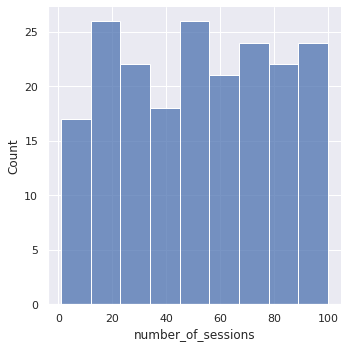

In [128]:
# Histogram liczby sesji dla liczby użytkowników
sns.displot(
    number_of_sessions_for_user,
    x="number_of_sessions"
)

In [8]:
time_of_each_session = sessions_df.groupby(['session_id']).timestamp.agg([min, max])
time_of_each_session['session_length'] = time_of_each_session['max'] - time_of_each_session['min']
time_of_each_session

,min,max,session_length
session_id,,,
124,2021-03-24 13:19:35,2021-03-24 13:36:36,0 days 00:17:01
125,2021-02-04 19:26:36,2021-02-04 19:32:29,0 days 00:05:53
126,2021-06-08 08:30:53,2021-06-08 08:54:29,0 days 00:23:36
127,2021-02-06 16:40:41,2021-02-06 17:05:04,0 days 00:24:23
128,2021-07-22 16:34:24,2021-07-22 17:04:19,0 days 00:29:55
...,...,...,...
10441,2021-01-04 17:05:56,2021-01-04 17:45:21,0 days 00:39:25
10442,2021-09-07 18:12:37,2021-09-07 18:13:27,0 days 00:00:50
10443,2021-01-18 19:13:02,2021-01-18 19:30:00,0 days 00:16:58


In [9]:
time_of_each_session.head()

,min,max,session_length
session_id,,,
124,2021-03-24 13:19:35,2021-03-24 13:36:36,0 days 00:17:01
125,2021-02-04 19:26:36,2021-02-04 19:32:29,0 days 00:05:53
126,2021-06-08 08:30:53,2021-06-08 08:54:29,0 days 00:23:36
127,2021-02-06 16:40:41,2021-02-06 17:05:04,0 days 00:24:23
128,2021-07-22 16:34:24,2021-07-22 17:04:19,0 days 00:29:55


In [10]:
time_of_each_session.session_length.describe()

count                        10322
mean     0 days 00:13:20.447393915
std      0 days 00:12:22.826952918
min                0 days 00:00:00
25%                0 days 00:02:48
50%                0 days 00:09:48
75%         0 days 00:22:38.750000
max                0 days 01:49:31
Name: session_length, dtype: object

In [11]:
sessions_when_sb_bought_product = sessions_df[sessions_df['event_type'] == 'BUY_PRODUCT']
sessions_when_sb_bought_product

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
10,124,2021-03-24 13:36:36,102,1013,BUY_PRODUCT,10,20001.0
13,125,2021-02-04 19:32:29,102,1281,BUY_PRODUCT,0,20002.0
57,132,2021-09-10 09:58:52,102,1067,BUY_PRODUCT,20,20003.0
72,134,2021-05-01 17:35:16,102,1081,BUY_PRODUCT,20,20004.0
75,135,2021-03-30 08:52:16,102,1234,BUY_PRODUCT,15,20005.0
...,...,...,...,...,...,...,...
64428,10436,2021-08-09 23:30:02,301,1039,BUY_PRODUCT,5,23721.0
64448,10438,2021-06-08 07:28:55,301,1293,BUY_PRODUCT,10,23722.0
64460,10440,2021-08-07 12:22:29,301,1039,BUY_PRODUCT,15,23723.0
64473,10441,2021-01-04 17:45:21,301,1293,BUY_PRODUCT,5,23724.0


In [12]:
time_of_sessions_when_sb_bought_product = time_of_each_session[time_of_each_session.index.isin(sessions_when_sb_bought_product.session_id)]
time_of_sessions_when_sb_bought_product.describe()

,session_length
count,3725
mean,0 days 00:15:19.614228187
std,0 days 00:12:41.292965439
min,0 days 00:00:05
25%,0 days 00:04:27
50%,0 days 00:12:11
75%,0 days 00:24:35
max,0 days 01:49:31


In [13]:
time_of_sessions_when_sb_didnt_bought_any_product = time_of_each_session[~time_of_each_session.index.isin(sessions_when_sb_bought_product.session_id)]
time_of_sessions_when_sb_didnt_bought_any_product.describe()

,session_length
count,6597
mean,0 days 00:12:13.159769592
std,0 days 00:12:03.633999890
min,0 days 00:00:00
25%,0 days 00:01:29
50%,0 days 00:08:41
75%,0 days 00:21:36
max,0 days 01:36:06


In [14]:
unique_bought_sessions = sessions_when_sb_bought_product.groupby(['session_id']).timestamp.min().to_frame()

unique_bought_sessions['time_before_bought'] = unique_bought_sessions['timestamp'] - time_of_each_session.loc[unique_bought_sessions.index]['min']
unique_bought_sessions.time_before_bought.describe()

count                         3725
mean     0 days 00:15:19.614228187
std      0 days 00:12:41.292965439
min                0 days 00:00:05
25%                0 days 00:04:27
50%                0 days 00:12:11
75%                0 days 00:24:35
max                0 days 01:49:31
Name: time_before_bought, dtype: object

In [15]:
time_of_each_session

,min,max,session_length
session_id,,,
124,2021-03-24 13:19:35,2021-03-24 13:36:36,0 days 00:17:01
125,2021-02-04 19:26:36,2021-02-04 19:32:29,0 days 00:05:53
126,2021-06-08 08:30:53,2021-06-08 08:54:29,0 days 00:23:36
127,2021-02-06 16:40:41,2021-02-06 17:05:04,0 days 00:24:23
128,2021-07-22 16:34:24,2021-07-22 17:04:19,0 days 00:29:55
...,...,...,...
10441,2021-01-04 17:05:56,2021-01-04 17:45:21,0 days 00:39:25
10442,2021-09-07 18:12:37,2021-09-07 18:13:27,0 days 00:00:50
10443,2021-01-18 19:13:02,2021-01-18 19:30:00,0 days 00:16:58


In [32]:
sessions_by_user_id = sessions_df.groupby('user_id')['session_id'].apply(set).apply(list)
sessions_by_user_id

user_id
102    [128, 129, 130, 131, 132, 133, 134, 135, 136, ...
103    [146, 147, 148, 149, 150, 151, 152, 153, 154, ...
104    [256, 257, 258, 259, 260, 261, 262, 263, 264, ...
105    [284, 285, 286, 287, 288, 289, 290, 291, 292, ...
106    [384, 385, 386, 387, 388, 389, 390, 391, 392, ...
                             ...                        
297    [10241, 10242, 10243, 10244, 10245, 10246, 102...
298    [10257, 10258, 10259, 10260, 10261, 10262, 102...
299    [10315, 10316, 10317, 10318, 10319, 10320, 103...
300    [10400, 10401, 10395, 10396, 10397, 10398, 10399]
301    [10402, 10403, 10404, 10405, 10406, 10407, 104...
Name: session_id, Length: 200, dtype: object

In [36]:
lenght_of_user_sessions = sessions_by_user_id.map(lambda set_of_ids: time_of_each_session.loc[set_of_ids]['session_length'].sum())
lenght_of_user_sessions

user_id
102   0 days 05:47:04
103   0 days 17:35:27
104   0 days 13:44:53
105   0 days 17:10:22
106   0 days 11:10:07
            ...      
297   0 days 04:02:22
298   0 days 12:21:35
299   0 days 19:52:04
300   0 days 01:55:24
301   0 days 11:00:02
Name: session_id, Length: 200, dtype: timedelta64[ns]

In [45]:
number_of_boughts = sessions_df[sessions_df['event_type'] == 'BUY_PRODUCT'].groupby('user_id')["session_id"].count()

In [113]:
lenght_of_sessions_and_number_of_boughts = pd.concat(dict(sum_of_sessions=lenght_of_user_sessions, number_of_boughts=number_of_boughts), axis=1)
lenght_of_sessions_and_number_of_boughts

,sum_of_sessions,number_of_boughts
user_id,,
102,0 days 05:47:04,6.0
103,0 days 17:35:27,28.0
104,0 days 13:44:53,29.0
105,0 days 17:10:22,27.0
106,0 days 11:10:07,18.0
...,...,...
297,0 days 04:02:22,6.0
298,0 days 12:21:35,22.0
299,0 days 19:52:04,23.0


In [150]:
summary_of_session_length = lenght_of_sessions_and_number_of_boughts.groupby('number_of_boughts').agg({'sum_of_sessions':lambda x: list(x)})
summary_of_session_length['mean'] = summary_of_session_length.sum_of_sessions.map(lambda list_of_dates: pd.Series(list_of_dates).mean())
summary_of_session_length['median'] = summary_of_session_length.sum_of_sessions.map(lambda list_of_dates: pd.Series(list_of_dates).median())
summary_of_session_length = summary_of_session_length.reset_index()
summary_of_session_length.number_of_boughts = summary_of_session_length.number_of_boughts.map(lambda x: int(x))
summary_of_session_length['mean_int'] = summary_of_session_length['mean'].map(lambda x: x/np.timedelta64(1, 'h'))
summary_of_session_length

,number_of_boughts,sum_of_sessions,mean,median,mean_int
0,1,"[0 days 01:06:38, 0 days 00:03:08, 0 days 00:2...",0 days 00:42:08.250000,0 days 00:44:55.500000,0.702292
1,2,"[0 days 01:57:15, 0 days 00:34:42, 0 days 02:3...",0 days 01:32:49.750000,0 days 01:33:06,1.547153
2,3,"[0 days 04:06:32, 0 days 04:08:33, 0 days 01:4...",0 days 02:20:06.285714285,0 days 01:50:23,2.335079
3,5,"[0 days 03:28:59, 0 days 04:03:45, 0 days 03:2...",0 days 03:39:34.500000,0 days 03:27:59,3.659583
4,6,"[0 days 05:47:04, 0 days 04:13:56, 0 days 03:2...",0 days 03:59:41.600000,0 days 03:44:56,3.994889
5,7,"[0 days 05:10:49, 0 days 04:15:20, 0 days 05:0...",0 days 04:50:09,0 days 05:04:18,4.835833
6,8,"[0 days 03:26:40, 0 days 04:01:20, 0 days 03:3...",0 days 04:33:24.600000,0 days 04:01:20,4.556833
7,9,"[0 days 04:43:10, 0 days 07:08:02, 0 days 06:0...",0 days 05:57:16.125000,0 days 06:02:38,5.954479
8,10,"[0 days 07:54:38, 0 days 05:38:18, 0 days 04:2...",0 days 05:48:38.500000,0 days 05:26:28,5.810694
9,11,"[0 days 05:05:09, 0 days 04:26:25]",0 days 04:45:47,0 days 04:45:47,4.763056


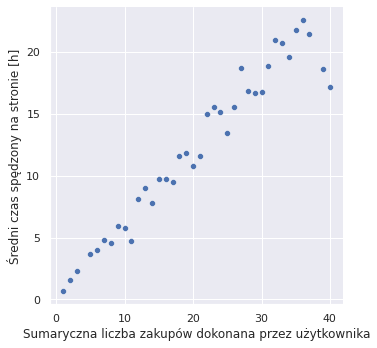

In [157]:
plot = sns.relplot(
    data=summary_of_session_length,
    x="number_of_boughts",
    y="mean_int"
)
plot.set(xlabel="Sumaryczna liczba zakupów dokonana przez użytkownika", ylabel="Średni czas spędzony na stronie [h]")
plt.show()